In [1]:
# imports

import numpy as np
import pandas as pd
import itertools

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score

from scipy import stats

import wrangle as w
import prepare as p
import explore as e

# Exercises

#### 1. Load your zillow dataset.



In [2]:
# get data
df = w.wrangle_zillow()
df

,year,beds,baths,area,prop_value,prop_tax,county
0,2005,4,2.0,3633,296425,6941.39,LA
1,2011,3,4.0,1620,847770,10244.94,LA
2,1926,3,2.0,2077,646760,7924.68,LA
6,1950,3,1.0,1244,169471,2532.88,LA
7,1950,3,2.0,1300,233266,3110.99,LA
...,...,...,...,...,...,...,...
2140230,2015,4,4.0,4375,422400,13877.56,LA
2140231,2015,4,3.0,2262,960756,13494.52,Orange
2140232,2014,4,4.5,3127,536061,6244.16,Orange
2140233,2015,3,2.5,1974,424353,5302.70,Orange


In [3]:
# encode county
df = p.encode_county(df)
df

,year,beds,baths,area,prop_value,prop_tax,county,Orange,Ventura
0,2005,4,2.0,3633,296425,6941.39,LA,0,0
1,2011,3,4.0,1620,847770,10244.94,LA,0,0
2,1926,3,2.0,2077,646760,7924.68,LA,0,0
6,1950,3,1.0,1244,169471,2532.88,LA,0,0
7,1950,3,2.0,1300,233266,3110.99,LA,0,0
...,...,...,...,...,...,...,...,...,...
2140230,2015,4,4.0,4375,422400,13877.56,LA,0,0
2140231,2015,4,3.0,2262,960756,13494.52,Orange,1,0
2140232,2014,4,4.5,3127,536061,6244.16,Orange,1,0
2140233,2015,3,2.5,1974,424353,5302.70,Orange,1,0


In [4]:
# split data
train,val,test = w.split_data(df)
train

,year,beds,baths,area,prop_value,prop_tax,county,Orange,Ventura
558946,1953,2,1.0,989,141500,2446.95,LA,0,0
156655,1972,4,2.0,2054,555982,6570.12,LA,0,0
2055932,1945,2,1.0,774,237093,2945.65,LA,0,0
687070,1958,3,2.0,1570,431696,5390.83,LA,0,0
1496477,2007,4,3.0,1919,598904,6709.22,Orange,1,0
...,...,...,...,...,...,...,...,...,...
723557,1955,5,2.0,1811,490263,1244.70,LA,0,0
587409,1971,3,2.0,1273,676152,6965.32,Orange,1,0
1801850,1939,2,1.0,1153,173237,2260.89,LA,0,0
352380,1947,3,1.0,1138,220705,3130.73,LA,0,0


In [5]:
# scale data
trains,vals,tests = p.robs_zillow(train,val,test)
trains

,year,beds,baths,area,prop_value,prop_tax,county,Orange,Ventura
558946,-0.20,-1.0,-1.0,-0.695602,141500,-0.430475,LA,0,0
156655,0.56,1.0,0.0,0.537037,555982,0.753635,LA,0,0
2055932,-0.52,-1.0,-1.0,-0.944444,237093,-0.287256,LA,0,0
687070,0.00,0.0,0.0,-0.023148,431696,0.414961,LA,0,0
1496477,1.96,1.0,1.0,0.380787,598904,0.793582,Orange,1,0
...,...,...,...,...,...,...,...,...,...
723557,-0.12,2.0,0.0,0.255787,490263,-0.775742,LA,0,0
587409,0.52,0.0,0.0,-0.366898,676152,0.867130,Orange,1,0
1801850,-0.76,-1.0,-1.0,-0.505787,173237,-0.483908,LA,0,0
352380,-0.44,0.0,-1.0,-0.523148,220705,-0.234104,LA,0,0


#### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of `taxvaluedollarcnt` (prop_value) using only `calculatedfinishedsqft` (area).
Here is some sample code to get you started:
- `from sklearn.linear_model import LinearRegression`
- `# assuming X and y are already defined`
- `model = LinearRegression().fit(X, y)`
- `predictions = model.predict(X)`

Modify and add to the code above as necessary for it to work with the zillow dataset.



In [6]:
df1 = trains[['area','prop_value']]
lr = LinearRegression().fit(df1[['area']],df1[['prop_value']])
baseline = df1['prop_value'].copy().mean()
df1 = df1.assign(yhat_bl=baseline)
df1 = df1.assign(yhat=lr.predict(df1[['area']]))

In [7]:
df1

,area,prop_value,yhat_bl,yhat
558946,-0.695602,141500,363861.621551,229178.527923
156655,0.537037,555982,363861.621551,416625.443967
2055932,-0.944444,237093,363861.621551,191337.131726
687070,-0.023148,431696,363861.621551,331438.300901
1496477,0.380787,598904,363861.621551,392864.567285
...,...,...,...,...
723557,0.255787,490263,363861.621551,373855.865940
587409,-0.366898,676152,363861.621551,279164.372201
1801850,-0.505787,173237,363861.621551,258043.592929
352380,-0.523148,220705,363861.621551,255403.495520


#### 3. Plot the residuals for the linear regression model that you made.



In [8]:
df1 = df1.assign(res_bl = (df1['yhat_bl'] - df1['prop_value']))
df1 = df1.assign(res = (df1['yhat'] - df1['prop_value']))

In [9]:
df1

,area,prop_value,yhat_bl,yhat,res_bl,res
558946,-0.695602,141500,363861.621551,229178.527923,222361.621551,87678.527923
156655,0.537037,555982,363861.621551,416625.443967,-192120.378449,-139356.556033
2055932,-0.944444,237093,363861.621551,191337.131726,126768.621551,-45755.868274
687070,-0.023148,431696,363861.621551,331438.300901,-67834.378449,-100257.699099
1496477,0.380787,598904,363861.621551,392864.567285,-235042.378449,-206039.432715
...,...,...,...,...,...,...
723557,0.255787,490263,363861.621551,373855.865940,-126401.378449,-116407.134060
587409,-0.366898,676152,363861.621551,279164.372201,-312290.378449,-396987.627799
1801850,-0.505787,173237,363861.621551,258043.592929,190624.621551,84806.592929
352380,-0.523148,220705,363861.621551,255403.495520,143156.621551,34698.495520


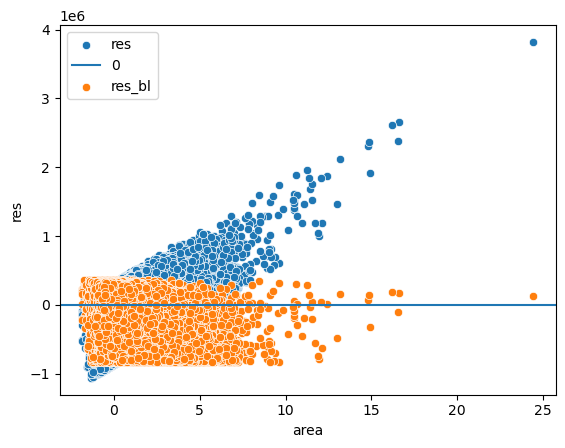

In [10]:
sns.scatterplot(data=df1,x='area',y='res')
plt.axhline(0)
sns.scatterplot(data=df1,x='area',y='res_bl')
plt.legend(loc='upper left',labels=['res','0','res_bl'])
plt.show()

#### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.



In [11]:
# SSE, ESS, TSS, MSE, RMSE
MSE = mean_squared_error(df1.prop_value,df1.yhat)
SSE = MSE*len(df1)
RMSE = MSE**.5
ESS = sum((df1.yhat - baseline)**2)
TSS = ESS + SSE
print("SSE = ", MSE)
print("MSE = ", SSE)
print("RMSE = ", RMSE)
print("ESS = ", ESS)
print("TSS = ", TSS)

SSE =  42911750272.23516
MSE =  5.2217206230519624e+16
RMSE =  207151.51525449957
ESS =  1.9731434855512508e+16
TSS =  7.194864108603213e+16


#### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average `taxvaluedollarcnt` amount).



In [12]:
# SSE, MSE, RMSE
MSE_bl = mean_squared_error(df1.prop_value,df1.yhat_bl)
SSE_bl = MSE_bl*len(df1)
RMSE_bl = MSE_bl**.5
print("SSE_bl = ", SSE_bl)
print("MSE_bl = ", MSE_bl)
print("RMSE_bl = ", RMSE_bl)

SSE_bl =  7.194864108601303e+16
MSE_bl =  59126911253.730354
RMSE_bl =  243160.25837650846


#### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.



In [13]:
metrics = pd.DataFrame({'metric':['SSE','MSE','RMSE']
                        ,'error':[SSE,MSE,RMSE]
                        ,'bl':[SSE_bl,MSE_bl,RMSE_bl]})
metrics = metrics.assign(delta=(metrics.error - metrics.bl))
metrics = metrics.assign(better=(metrics.delta<0))
metrics

,metric,error,bl,delta,better
0,SSE,5.221721e+16,7.194864e+16,-1.973143e+16,True
1,MSE,4.291175e+10,5.912691e+10,-1.621516e+10,True
2,RMSE,2.071515e+05,2.431603e+05,-3.600874e+04,True


#### 7. What is the amount of variance explained in your model?



In [14]:
evs = explained_variance_score(df1.prop_value,df1.yhat)
print('Variance = ', round(evs,3))

Variance =  0.274


#### 8. Is your model better than the baseline model?



In [15]:
df2 = vals[['area','prop_value']]
df2 = df2.assign(yhat_bl=baseline)
df2 = df2.assign(yhat=lr.predict(df2[['area']]))

df3 = vals[['area','prop_value']]
df3 = df3.assign(yhat_bl=baseline)
df3 = df3.assign(yhat=lr.predict(df3[['area']]))

In [16]:
y='prop_value'
yhat='yhat'
tr_MSE = mean_squared_error(df1[y],df1[yhat])
tr_SSE = tr_MSE*len(df1)
tr_RMSE = tr_MSE**.5
tr_MSE_bl = mean_squared_error(df1[y],df1[yhat])
tr_SSE_bl = tr_MSE_bl*len(df1)
tr_RMSE_bl = tr_MSE_bl**.5
print('Train Model SSE better than baseline: ',tr_SSE - tr_SSE_bl < 1)
print('Train Model MSE better than baseline: ',tr_MSE - tr_MSE_bl < 1)
print('Train Model RMSE better than baseline: ',tr_RMSE - tr_RMSE_bl < 1)
v_MSE = mean_squared_error(df2[y],df2[yhat])
v_SSE = v_MSE*len(df2)
v_RMSE = v_MSE**.5
v_MSE_bl = mean_squared_error(df2[y],df2[yhat])
v_SSE_bl = v_MSE_bl*len(df2)
v_RMSE_bl = v_MSE_bl**.5
print('Validate Model SSE better than baseline: ',v_SSE - v_SSE_bl < 1)
print('Validate Model MSE better than baseline: ',v_MSE - v_MSE_bl < 1)
print('Validate Model RMSE better than baseline: ',v_RMSE - v_RMSE_bl < 1)
t_MSE = mean_squared_error(df3[y],df3[yhat])
t_SSE = t_MSE*len(df3)
t_RMSE = t_MSE**.5
t_MSE_bl = mean_squared_error(df3[y],df3[yhat])
t_SSE_bl = t_MSE_bl*len(df3)
t_RMSE_bl = t_MSE_bl**.5
print('Test Model SSE better than baseline: ',t_SSE - t_SSE_bl < 1)
print('Test Model MSE better than baseline: ',t_MSE - t_MSE_bl < 1)
print('Test Model RMSE better than baseline: ',t_RMSE - t_RMSE_bl < 1)

Train Model SSE better than baseline:  True
Train Model MSE better than baseline:  True
Train Model RMSE better than baseline:  True
Validate Model SSE better than baseline:  True
Validate Model MSE better than baseline:  True
Validate Model RMSE better than baseline:  True
Test Model SSE better than baseline:  True
Test Model MSE better than baseline:  True
Test Model RMSE better than baseline:  True


In [17]:
# I think so, error on model is smaller than bl err

In [18]:
slope, intercept, r, p, se = stats.linregress(df1.area,df1.prop_value)
sts = pd.DataFrame([['slope', 'intercept', 'r', 'p', 'se'],[slope, intercept, r, p, se]])
sts

,0,1,2,3,4
0,slope,intercept,r,p,se
1,152069.610763,334958.43078,0.523682,0.0,224.259873


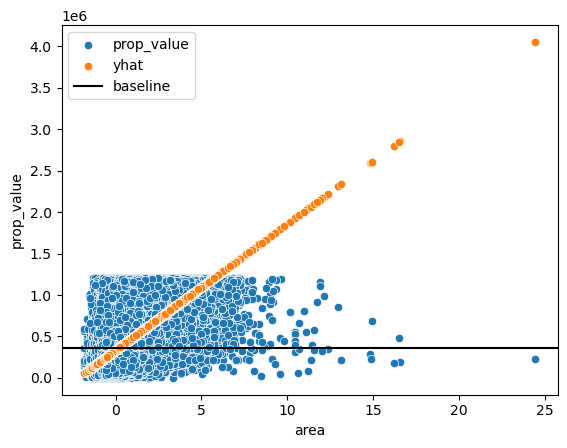

In [19]:
sns.scatterplot(data=df1,x='area',y='prop_value')
sns.scatterplot(data=df1,x='area',y='yhat')
plt.axhline(baseline, color='black')
plt.legend(loc='upper left',labels=['prop_value','yhat','baseline'])
plt.show()

#### 9. Create a file named `evaluate.py` that contains the following functions.
- `plot_residuals(y, yhat)`: creates a residual plot
- `regression_errors(y, yhat)`: returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- `baseline_mean_errors(y)`: computes the SSE, MSE, and RMSE for the baseline model
- `better_than_baseline(y, yhat)`: returns true if your model performs better than the baseline, otherwise false

In [20]:
import evaluate

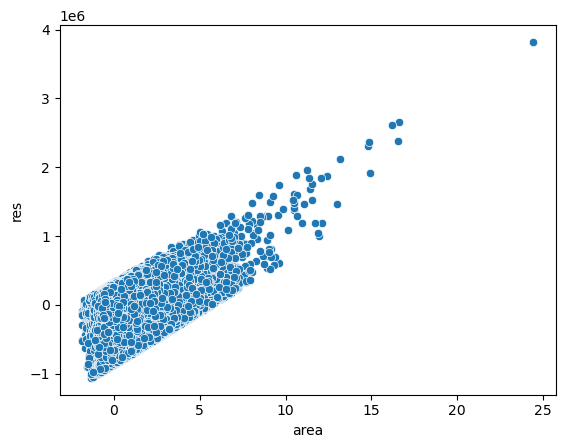

In [21]:
evaluate.plot_res(df1,'area','prop_value','yhat')

In [22]:
evaluate.reg_err(df1,'prop_value','yhat')

SSE =  5.2217206230519624e+16
ESS =  1.9731434855512508e+16
TSS =  7.194864108603213e+16
MSE =  42911750272.23516
RMSE =  207151.51525449957


In [23]:
evaluate.bl_mean_err(df1,'prop_value','yhat_bl')

SSE_bl =  7.194864108601303e+16
MSE_bl =  59126911253.730354
RMSE_bl =  243160.25837650846


In [24]:
evaluate.better_than_bl(df1,'prop_value','yhat','yhat_bl')

Model SSE better:  True
Model MSE better:  True
Model RMSE better:  True


not scaled

In [25]:
x='area'
y='prop_value'
tr,v,t = w.split_data(df)
df5 = tr[[x,y]]
lr = LinearRegression().fit(df5[[x]],df5[[y]])
baseline = df5[y].copy().mean()
df5 = df5.assign(yhat_bl=baseline)
df5 = df5.assign(yhat=lr.predict(df5[[x]]))

In [26]:
yhat='yhat'
yhat_bl='yhat_bl'

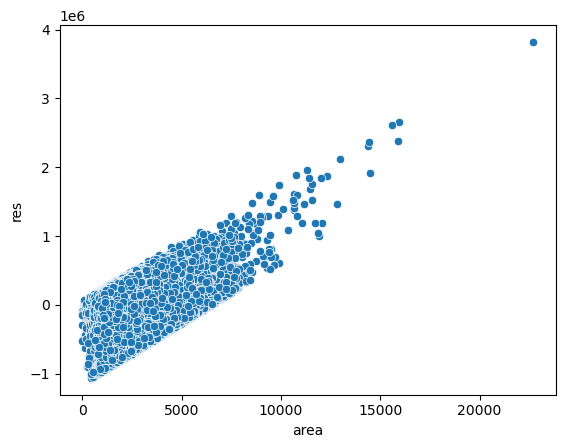

In [27]:
evaluate.plot_res(df5,x,y,yhat)

In [28]:
evaluate.reg_err(df5,y,yhat)

SSE =  5.2217206230519624e+16
ESS =  1.9731434855512508e+16
TSS =  7.194864108603213e+16
MSE =  42911750272.23516
RMSE =  207151.51525449957


In [29]:
evaluate.bl_mean_err(df5,y,yhat_bl)

SSE_bl =  7.194864108601303e+16
MSE_bl =  59126911253.730354
RMSE_bl =  243160.25837650846


In [30]:
evaluate.better_than_bl(df5,y,yhat,yhat_bl)

Model SSE better:  True
Model MSE better:  True
Model RMSE better:  True


### Bonus Exercises


#### 1. Load the `tips` dataset from either pydataset or seaborn. Fit a linear regression model (ordinary least squares) and compute `yhat`, predictions of `tip` using `total_bill`.



In [31]:
from pydataset import data

In [32]:
tips = data('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.00,Female,Yes,Sat,Dinner,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2


In [33]:
x='total_bill'
y='tip'
tr,v,t = w.split_data(tips)
tip1 = tr[[x,y]]
lr = LinearRegression().fit(tip1[[x]],tip1[[y]])
baseline = tip1[y].copy().mean()
tip1 = tip1.assign(yhat_bl=baseline)
tip1 = tip1.assign(yhat=lr.predict(tip1[[x]]))

In [34]:
yhat='yhat'
yhat_bl='yhat_bl'

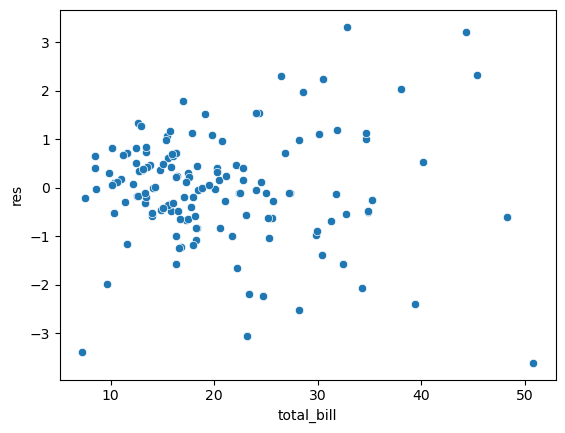

In [35]:
evaluate.plot_res(tip1,x,y,yhat)

In [36]:
evaluate.reg_err(tip1,y,yhat)

SSE =  176.5105697841559
ESS =  123.46601446241955
TSS =  299.97658424657544
MSE =  1.208976505370931
RMSE =  1.0995346767478191


In [37]:
evaluate.bl_mean_err(tip1,y,yhat_bl)

SSE_bl =  299.97658424657544
MSE_bl =  2.054634138675174
RMSE_bl =  1.4333995042119885


In [38]:
evaluate.better_than_bl(tip1,y,yhat,yhat_bl)

Model SSE better:  True
Model MSE better:  True
Model RMSE better:  True


#### 2. Load the `mpg` dataset and fit a model that predicts `highway mileage` based on `engine displacement`. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your `evaluate.py` to help accomplish this.

In [39]:
mpg = data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [40]:
x='displ'
y='hwy'
tr,v,t = w.split_data(mpg)
mpg1 = tr[[x,y]]
lr = LinearRegression().fit(mpg1[[x]],mpg1[[y]])
baseline = mpg1[y].copy().mean()
mpg1 = mpg1.assign(yhat_bl=baseline)
mpg1 = mpg1.assign(yhat=lr.predict(mpg1[[x]]))

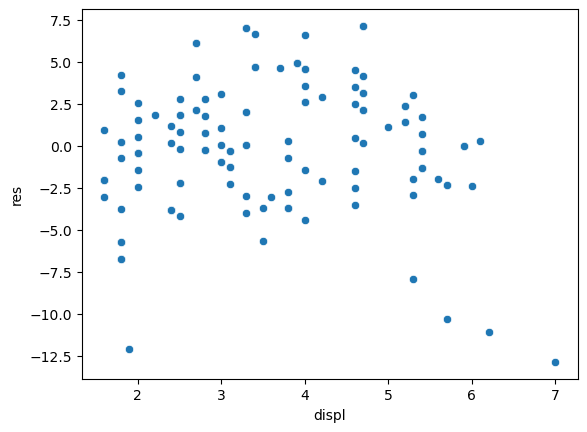

In [41]:
evaluate.plot_res(mpg1,x,y,yhat)

In [42]:
evaluate.reg_err(mpg1,y,yhat)

SSE =  1922.5618165889746
ESS =  2886.1810405538795
TSS =  4808.742857142854
MSE =  13.73258440420696
RMSE =  3.705750181030416


In [43]:
evaluate.bl_mean_err(mpg1,y,yhat_bl)

SSE_bl =  4808.742857142856
MSE_bl =  34.34816326530612
RMSE_bl =  5.860730608491242


In [44]:
evaluate.better_than_bl(mpg1,y,yhat,yhat_bl)

Model SSE better:  True
Model MSE better:  True
Model RMSE better:  True
